# Understanding User Demographics for BOTH Men & Women from [OKCupid](https://www.okcupid.com/) Dataset

 OkCupid is a *__popular dating app__* that has released a large dataset of user profiles, and demographic information. <br>
 The dataset contains over __60,000__ users from the __United States__. <br>
 It's important to note that the dataset was collected in 2014 and may not reflect the current user population or dating preferences on the OkCupid platform
 <br>
 https://github.com/rudeboybert/JSE_OkCupid

There are 2 datasets that OKCupid has released publicly.
1. User Demographics
2. Bio data containing questions/answers (Essays, questions and prompts)
<br>
<body>

For this analysis, I will limit the scope to __User Demographics__ dataset only

In [1]:
#importing necessary libraries for exploratory data analysis
import pandas as pd  # for working with dataframes
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns  # for high-level interface for visualizations
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Reading the user demographics dataset
df = pd.read_csv('profiles_revised.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### The OkCupid dataset includes a variety of demographic information about users, including:

1. Age
2. Gender
3. Sexual orientation
4. Relationship status
5. Education level
6. Body type
7. Height
8. Ethnicity
9. Religion
10. Smoking and drinking habits
11. Pets
12. Languages spoken
13. Income
<br>
<body>
    
These variables can be used to get an high level picture of users who are active on dating sites __while assuming__ that this dataset is true representative of __population__ who are active on dating sites like Tinder, OKCupid etc.

# Focus of Analysis
While exploring this dataset, I will be __focusing my attention__ if the demographics variables __differ across Men and Women__ and will try to prove/disprove any research questions using **statistical hypothesis tests** that will arise in the process

In [4]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.335402,68.295281,20033.222534
std,9.490009,3.994803,97346.192104
min,17.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,111.000000,95.000000,1000000.000000


In [7]:
## Helper function to display data labels on graph
## Courtesy: https://www.statology.org/seaborn-barplot-show-values/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

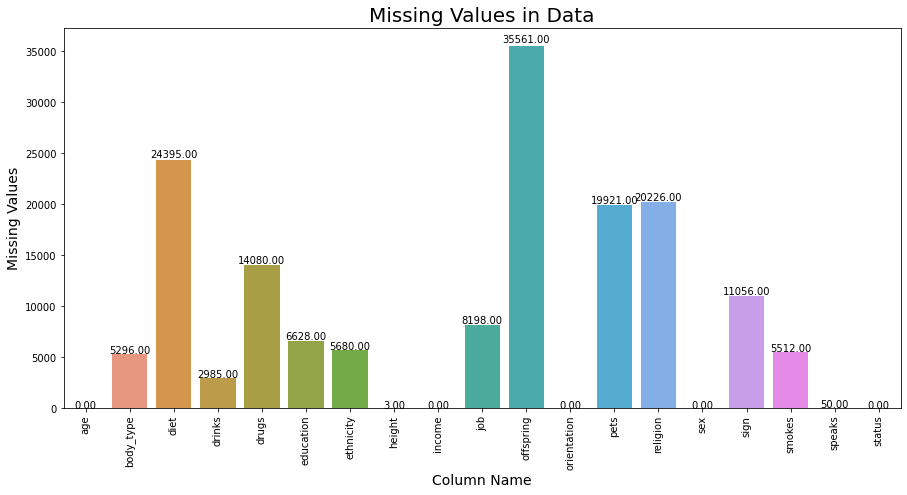

In [6]:
plt.figure(figsize=(15,7))
plt.title("Missing Values in Data",size=20)
ax = sns.barplot(data=df.isnull().sum().rename('count').reset_index(), x="index", y="count")
ax.set_ylabel('Missing Values',fontsize=14)
ax.set_xlabel("Column Name",fontsize=14)
plt.xticks(rotation=90)
show_values(ax)

Text(0, 0.5, 'Probability Density Function')

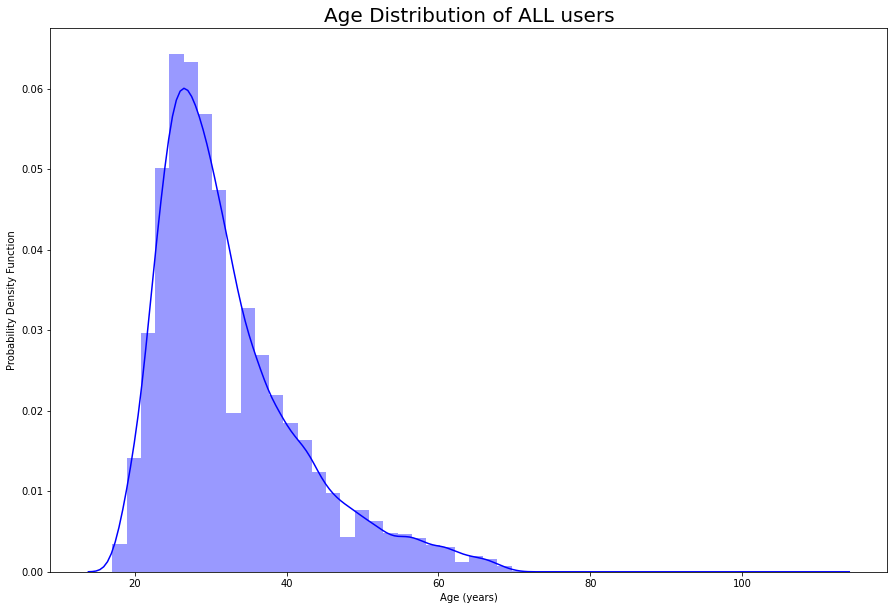

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df['age'],kde=True,color='b')
plt.title("Age Distribution of ALL users",size=20)
plt.xlabel("Age (years)")
plt.ylabel("Probability Density Function")

In [9]:
# Find the Average and Median values of the age column
age_median = df['age'].median()
age_average = df['age'].mean()

# Print the results
print('Median Age:', round(age_median,0))
print('Average Age:', round(age_average,0))

Median Age: 30.0
Average Age: 32.0


Text(0.5, 1.0, 'Age Distribution of users - By Gender')

<Figure size 1080x720 with 0 Axes>

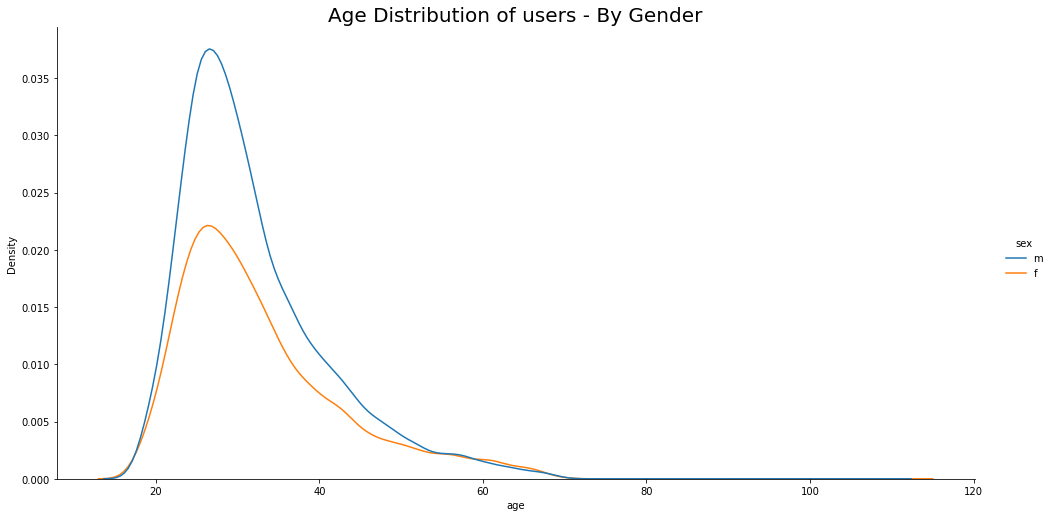

In [10]:
plt.figure(figsize=(15,10))
sns.displot(data=df,x='age',hue='sex',height=7,aspect=2,kind="kde")
plt.title("Age Distribution of users - By Gender",size=20)

By looking at just __Kurtosis__ of above distributions of male/female, it is evident that in dataset ___proportion of male is greater than female___

How much proportion of men is greater? Let's findout

In [11]:
### Calculating proportion of male/female in dataset
df.sex.value_counts()/df.shape[0]

m    0.597688
f    0.402312
Name: sex, dtype: float64

This evidence implies that proportion of men is 60% and of women is 40%

In [12]:
## Helper Function to display MEDIAN number on Boxplot
## Courtesy: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value
import matplotlib.patheffects as path_effects
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

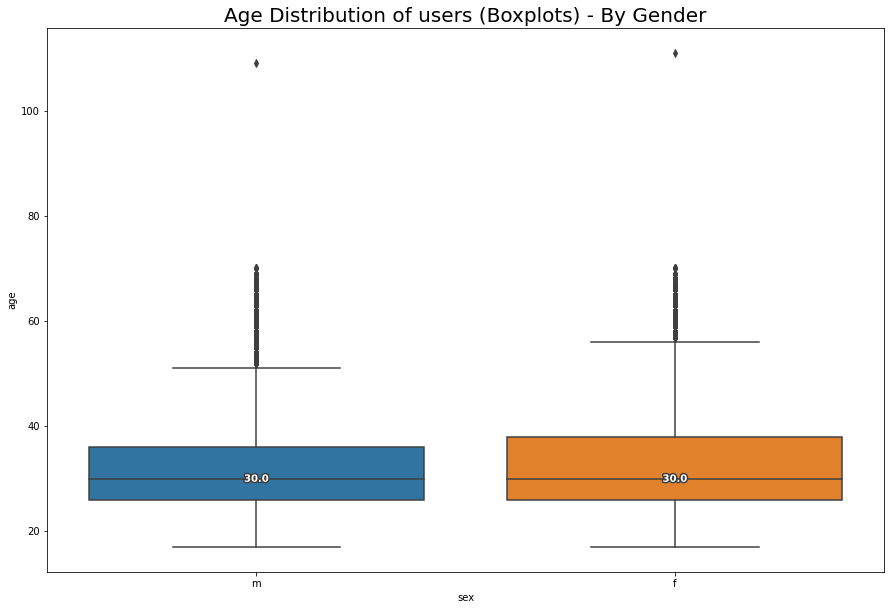

In [13]:
plt.figure(figsize=(15,10))
plt.title("Age Distribution of users (Boxplots) - By Gender",size=20)
ax = sns.boxplot(data=df, x="sex", y="age",orient="v")
add_median_labels(ax)

It's interesting to see that Minimum allowed age to be on dating app is 18 years as shown in Boxplots by the __Lowest Whisker__ (this also represents minimum value). If one enters age that is less than 18 years then they can't signup for it.

By Looking at the both log-normal distribution and boxplots of __age__ variable, it is clear the age distribution of users in the dataset is almost __similar__ across Men and Women

## Status

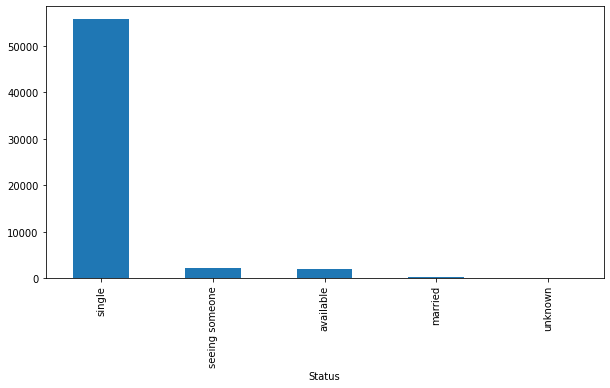

In [14]:
plt.figure(figsize=(10,5))
df.status.value_counts().plot(kind = 'bar',xlabel="Status")
plt.show()

In [15]:
df_status = df.groupby(['status','sex'])['age'].count().reset_index().rename(columns={'age':'count'}).sort_values(by='sex',ascending=False)
df_status['proportion'] = 100 * df_status['count'] / df_status.groupby(['sex'])['count'].transform('sum')

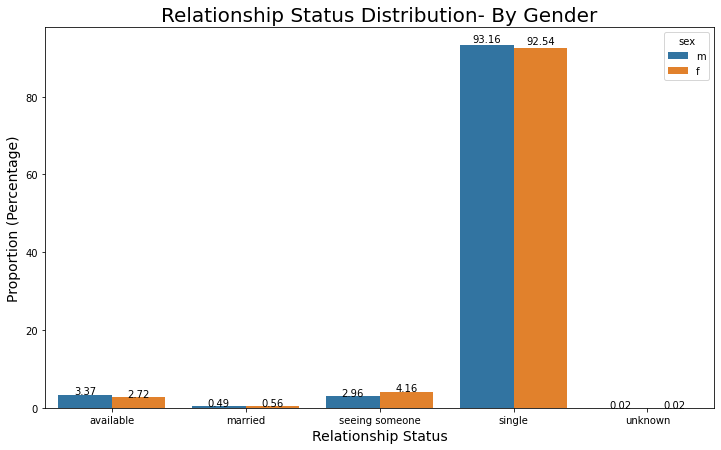

In [16]:
plt.figure(figsize=(12,7))
plt.title("Relationship Status Distribution- By Gender",size=20)
ax = sns.barplot(data=df_status, x="status", y="proportion", hue="sex")
ax.set_ylabel('Proportion (Percentage)',fontsize=14)
ax.set_xlabel("Relationship Status",fontsize=14)
show_values(ax)

## Which gender is more open to dating multiple people at given time? (Research Question)

From the above visualisation, we have proportion of different statuses across male and female. <br>
It's interesting to see proportion of people who are already seeing someone and are still looking for a match on OKCupid. <br>
This proportion is:
1. 2.96% for __Men__
2. 4.16% for __Women__

_Does that imply that, in general, Women are more inclined to date multiple people than Men?_ <br>
Or the difference in proportion that we are looking at is merely __due to chance__ and no actual relationship exists

We can test this assumption performing z-statistic test __(Frequentist Statistics)__ for 2 sample proportions where
1. __Null Hypothesis:__ There is no diffence in proportion (of interest) b/w men and women
2. __Alternative Hypothesis:__ There is clearly a differencer in proportion (of interest) b/w men and women
<br>
<body>
    
__P.S:__ Not going in detail here the background of this z-test statistic as I have limited time but I can share details during interview if needed.

__Assumptions about the data for running this statistical__
<br>
1. Each user in dataset is independent of each other (I.I.D aka Independent and Identically Distributed) (We assume, this is the case)
2. Enough sample size ( this holds true)

In [17]:
## Importing library to perform statistical test to validate our hypothesis
from statsmodels.stats.proportion import proportions_ztest

In [18]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [19]:
n_success = np.array([1061,1003]) ## Numerator for proportion for M and F respectively
n_size = np.array([35829,24117])
z_score, p_value = proportions_ztest(count=n_success,nobs=n_size,alternative="two-sided")
# Print the results
print('z_score:', round(z_score,3))
print('p-value:', round(p_value,0))

z_score: -7.886
p-value: 0.0


We got p-value of 0.00. It means...<br>
There is 0% probability that __"tendency of women of dating multiple people is 4.16-2.96 = 1.20% MORE than Men"__ is _by chance or random noise._
<br>

It means both genders show __different behavior__ when it comes to dating multiple people at a given time

Next question arises why this could be the case that proportion is greater for women? Bot since the uplift(gap = 1.20%) is not very __practical significant__, I will not try to further deep-dive the root-causes.

## Height

<Figure size 1080x720 with 0 Axes>

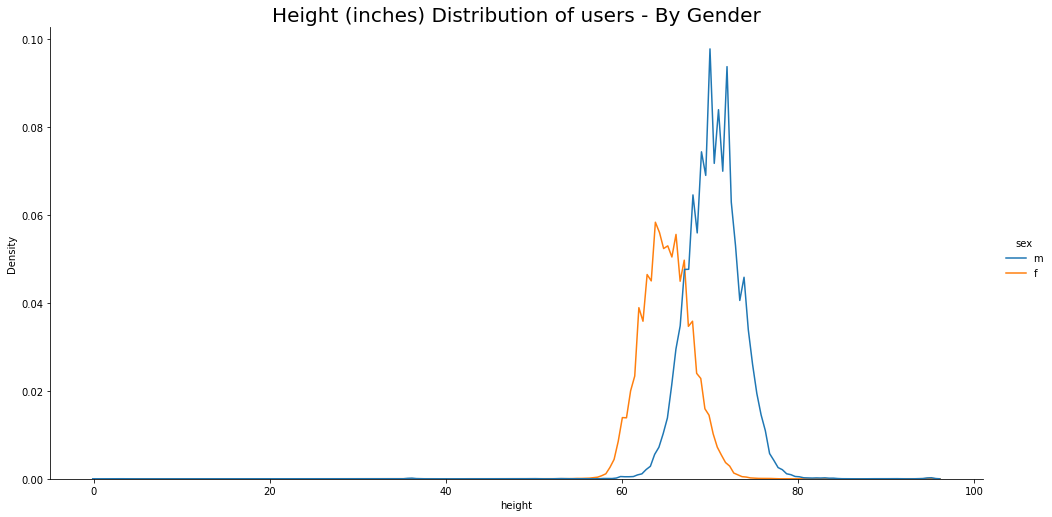

In [21]:
from scipy.stats import norm
from scipy import stats
plt.figure(figsize=(15,10))
sns.displot(data=df,x='height',hue='sex',height=7,aspect=2,kind="kde")
plt.title("Height (inches) Distribution of users - By Gender",size=20)
plt.show()

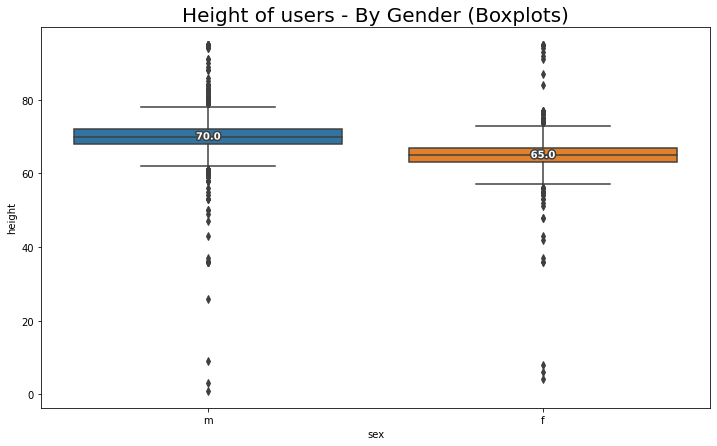

In [22]:
plt.figure(figsize=(12,7))
plt.title("Height of users - By Gender (Boxplots)",size=20)
ax1 = sns.boxplot(data=df, x="sex", y="height",orient="v")
add_median_labels(ax1)

In [23]:
df.groupby('sex')['height'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,24116.0,65.103873,2.926502,4.0,63.0,65.0,67.0,95.0
m,35827.0,70.443492,3.076521,1.0,68.0,70.0,72.0,95.0


By looking at outliers in height for both genders, it seems some users enter fictitious/random heights in their profile

We observe that height distributions for both men/women can be approximated by normal distribution and when there is normal distribution THEN average = median <br>
We, __on average, men are 5 inches (12 cm) taller than women__

#### Let's run statistical test if difference of height is statistical significant among gender

In [24]:
## Running statistical test for difference of mean heights for men and women
## NULL Hypothesis = There is no difference in mean heights of men and women
## Alternate Hypothesis: Mean height is different for both Men and Women
from bioinfokit.analys import stat
import itertools
male_height_col = list(df[df['sex']=='m']['height'].dropna())
female_height_col = list(df[df['sex']=='f']['height'].dropna())
nest = [male_height_col,female_height_col]
height_df = pd.DataFrame((_ for _ in itertools.zip_longest(*nest)), columns=['male_height','female_height'])
res = stat()
res.ztest(df=height_df, x='male_height', y='female_height', x_std=height_df.male_height.std(), y_std=height_df.female_height.std(), test_type=2)
print(res.summary)


Two Sample Z-test 

------------------  -----------
Sample size for x   35827
Sample size for y   24116
Mean of x              70.4435
Mean of y              65.1039
Z value               214.562
p value (one-tail)      0
p value (two-tail)      0
Lower 95.0%             5.29084
Upper 95.0%             5.3884
------------------  -----------


BY running z-test for difference of mean b/w men and women's heights, we see that __this difference of 5 inches is statistically significant__ 

## Ethnicity

In [25]:
## Missing values for "Ethnicity" out of 60K records
df.ethnicity.isnull().sum()/df.shape[0]

0.09475194341574084

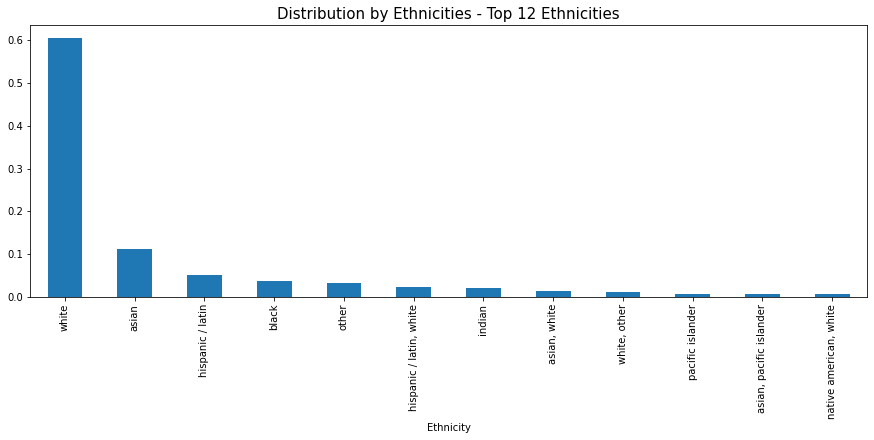

In [27]:
plt.figure(figsize=(15,5))
df.ethnicity.value_counts(normalize=True).head(12).plot(kind = 'bar',xlabel="Ethnicity")
plt.title("Distribution by Ethnicities - Top 12 Ethnicities",size=15)
plt.show()

#### As we can see this doesn't contain discrete categories so let's clean this data

In [28]:
users = df.copy()

In [29]:
users.ethnicity.replace({'indian':'asian','hispanic / latin, white':'hispanic / latin'},inplace=True)

In [30]:
temp = users.ethnicity.value_counts().reset_index()
temp.head(10)

,index,ethnicity
0,white,32831
1,asian,7211
2,hispanic / latin,4124
3,black,2008
4,other,1706
5,"asian, white",811
6,"white, other",641
7,pacific islander,432
8,"asian, pacific islander",395
9,"native american, white",338


In [31]:
replaceable_list = temp[temp['ethnicity'] < 1000]['index'].unique()

In [32]:
ethicities_list = ['white','asian','hispanic / latin','black','other']

In [33]:
users.ethnicity.replace(replaceable_list,'other',inplace=True)

In [34]:
users.ethnicity.value_counts(normalize=True)

white               0.605001
other               0.149117
asian               0.132882
hispanic / latin    0.075996
black               0.037003
Name: ethnicity, dtype: float64

#### So after cleaning it, we have 5 distinct categories

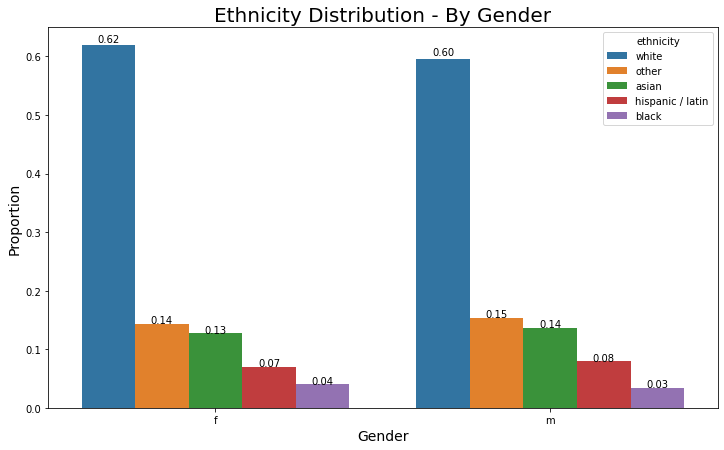

In [35]:
plt.figure(figsize=(12,7))
plt.title("Ethnicity Distribution - By Gender",size=20)
ax = sns.barplot(data=users['ethnicity'].groupby(users['sex']).value_counts(normalize=True).rename('proportion').reset_index(), x="sex", y="proportion", hue="ethnicity")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Gender",fontsize=14)
show_values(ax)

Text(0.5, 1.0, 'Height Distribution Per Ethnicity')

<Figure size 1080x720 with 0 Axes>

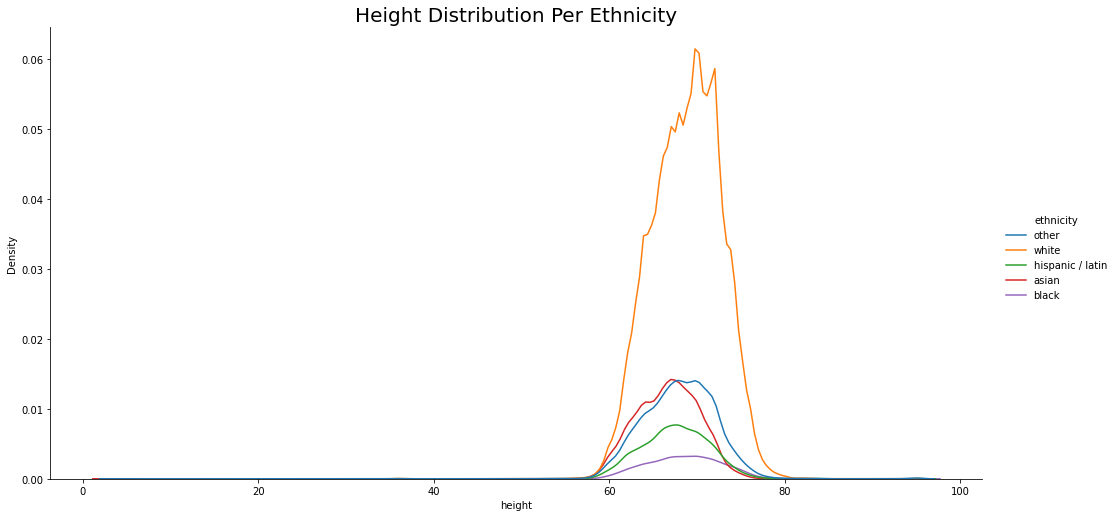

In [36]:
plt.figure(figsize=(15,10))
sns.displot(data=users,x='height',hue='ethnicity',height=7,aspect=2,kind="kde")
plt.title("Height Distribution Per Ethnicity",size=20)

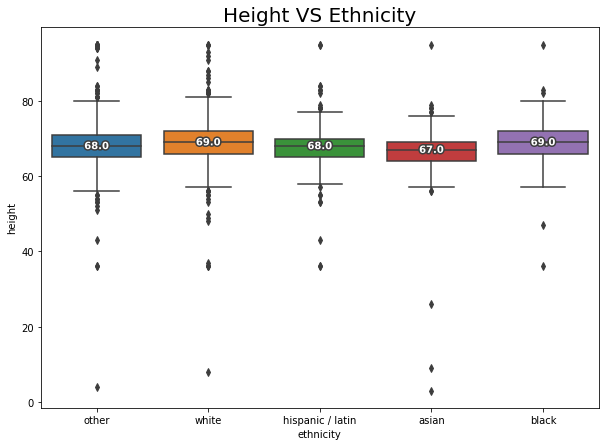

In [36]:
plt.figure(figsize=(10,7))
plt.title("Height VS Ethnicity",size=20)
ax2 = sns.boxplot(data=users, x="ethnicity", y="height",orient="v")
add_median_labels(ax2)

In [37]:
df_temp = users.groupby(['ethnicity','sex'])['height'].count().reset_index().rename(columns={'height':'count'}).sort_values(by='sex',ascending=False)
df_temp['proportion'] = 100 * df_temp['count'] / df_temp.groupby(['ethnicity'])['count'].transform('sum')

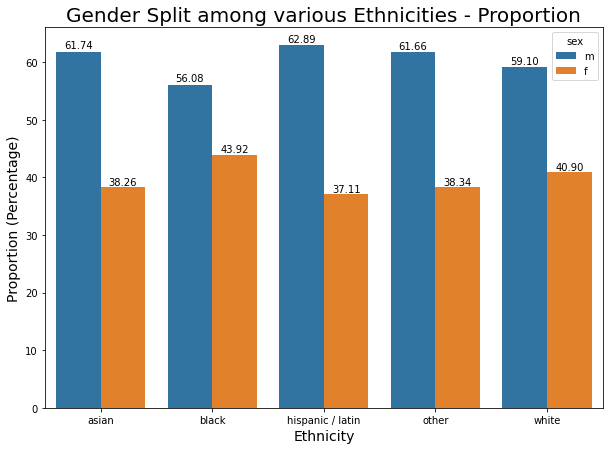

In [38]:
plt.figure(figsize=(10,7))
plt.title("Gender Split among various Ethnicities - Proportion",size=20)
ax = sns.barplot(data=df_temp, x="ethnicity", y="proportion", hue="sex")
ax.set_ylabel('Proportion (Percentage)',fontsize=14)
ax.set_xlabel("Ethnicity",fontsize=14)
show_values(ax)

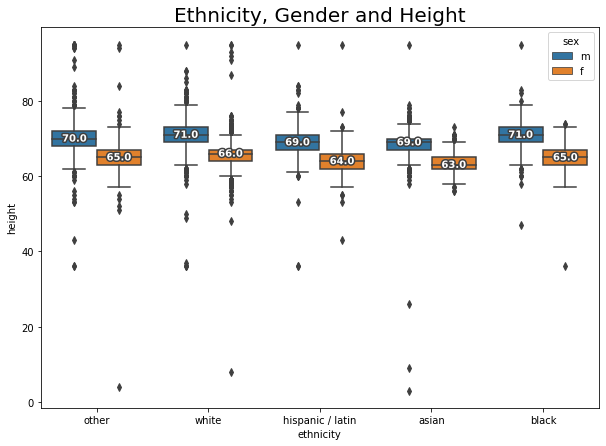

In [39]:
## We have seen on average Men are 5 inches taller than women. Does this hold true in all ethnicities??
plt.figure(figsize=(10,7))
plt.title("Ethnicity, Gender and Height",size=20)
ax2 = sns.boxplot(data=users, x="ethnicity", y="height", hue="sex",orient="v")
add_median_labels(ax2)

## Does average height differ among different Ehnicities? (Research Question)

_Let's go back to our original insight where we saw __Asians__, on average, are shorter than __White__ <br>_
(Also we have already saw from the data that gender split is almost proportional in various ethnicities (except Black) so this effect of gender is averaged out in the dataset)

Let's run a statistical (ANOVA) tews to compare the average height among various ethnicities. (Prior conditions to run this test has been met)
1. __Null Hypothesis:__ There is no difference b/w average heights
2. __Alternate Hypothesis:__ Atleast one group has statistically different height

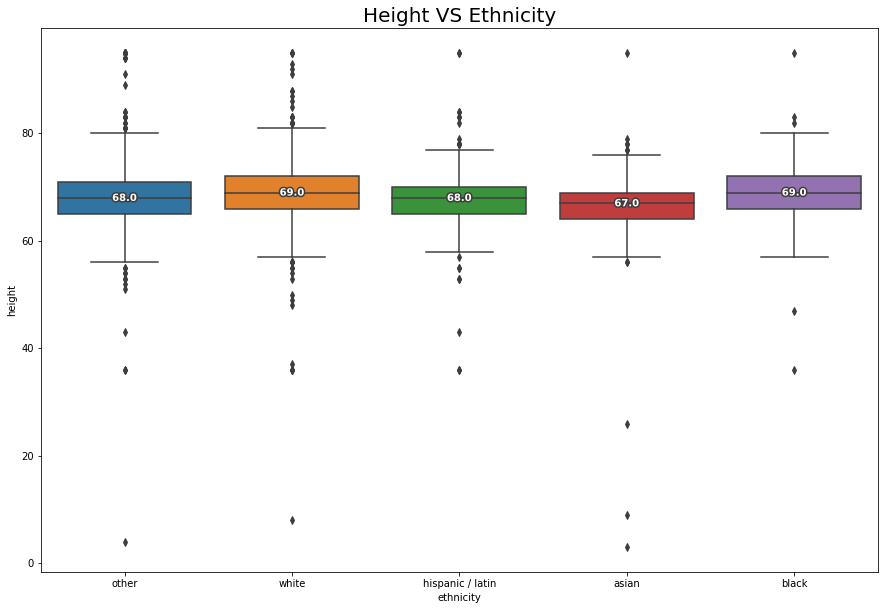

In [40]:
plt.figure(figsize=(15,10))
plt.title("Height VS Ethnicity",size=20)
ax2 = sns.boxplot(data=users, x="ethnicity", y="height",orient="v")
add_median_labels(ax2)

In [41]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=users, res_var='height', anova_model='height ~ C(ethnicity)')
res.anova_summary
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
C(ethnicity),4.0,31709.027330,7927.256832,521.803236,0.0
Residual,54259.0,824305.023072,15.192042,NaN,NaN


Above, is the p-value computed by ANOVA. It's 0.00, that is < 0.05
<br>
__It means Asians are in fact shorter than white community by 2 inches/5 cm, on average.__

## Languages Spoken

In the dataset, we are also given the details of how many languages a user speak. <br>

In [43]:
df.speaks.head(5)

0                                              english
1    english (fluently), spanish (poorly), french (...
2                                 english, french, c++
3                             english, german (poorly)
4                                              english
Name: speaks, dtype: object

I will try to count the languages a person speaks and store that value in a separate column. <br>
There is __one programming language C++__ in the list as well, I will omit this from __total_languages_Spoken__ column. <br>
Below code will do all data transformation + cleaning to calculate it.

<AxesSubplot:xlabel='Languages Spoken'>

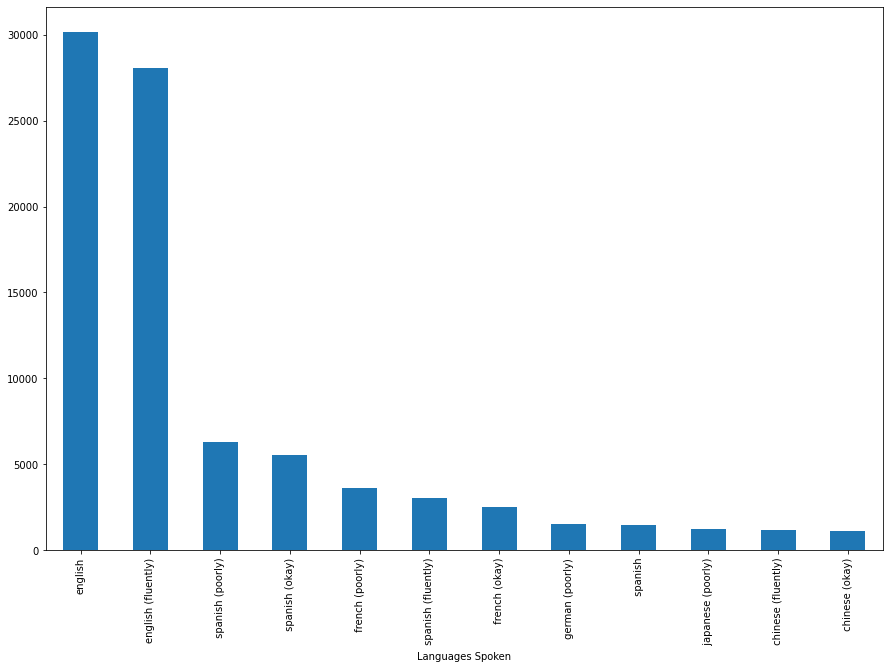

In [44]:
plt.figure(figsize=(15,10))
df['speaks'].str.split(',').explode('speaks').value_counts().head(12).plot(kind = 'bar',xlabel="Languages Spoken")

In [45]:
users.speaks.isnull().sum()

50

Almost 50 entries have NULL values

In [46]:
df['speaks']=df['speaks'].fillna("")
df['spoken_count'] = df['speaks'].apply(lambda n: len(n.split(',')))

In [47]:
users['speaks']=users['speaks'].fillna("")
users['spoken_count'] = users['speaks'].apply(lambda n: len(n.split(',')))

In [48]:
df['contains_c++'] = df['speaks'].str.contains('c+')

In [49]:
users['contains_c++'] = users['speaks'].str.contains('c+')

In [50]:
df['speaks'].str.contains('c+').sum()

13026

In [51]:
## Excluding C++ in language spoken count
df['total_languages_spoken'] = np.where(df['contains_c++'], df['spoken_count']-1, df['spoken_count'])
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,pets,religion,sex,sign,smokes,speaks,status,spoken_count,contains_c++,total_languages_spoken
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,1,False,1
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,3,True,2
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3,True,2
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,2,False,2
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,likes dogs and likes cats,NaN,m,aquarius,no,english,single,1,False,1


In [52]:
users['total_languages_spoken'] = np.where(users['contains_c++'], users['spoken_count']-1, users['spoken_count'])

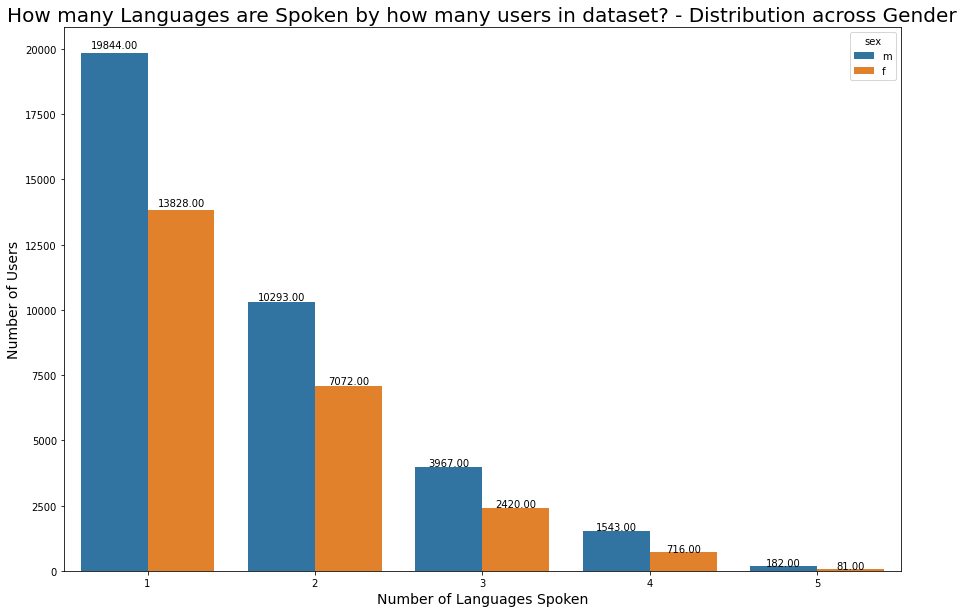

In [53]:
plt.figure(figsize=(15,10))
plt.title("How many Languages are Spoken by how many users in dataset? - Distribution across Gender",size=20)
ax = sns.countplot(data=df, x="total_languages_spoken", hue="sex")
ax.set_ylabel('Number of Users',fontsize=14)
ax.set_xlabel("Number of Languages Spoken",fontsize=14)
show_values(ax)

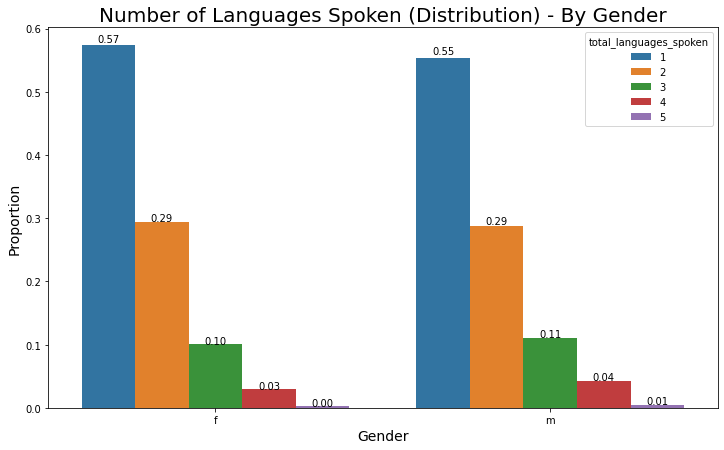

In [54]:
plt.figure(figsize=(12,7))
plt.title("Number of Languages Spoken (Distribution) - By Gender",size=20)
ax = sns.barplot(data=df.total_languages_spoken.groupby(df['sex']).value_counts(normalize=True).rename('proportion').reset_index(), x="sex", y="proportion", hue="total_languages_spoken")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Gender",fontsize=14)
show_values(ax)

As confirmed by viz. above, __around 44% users in the dataset speak atleast 2 languages__ <br>
This distribution is similar across both genders

### Does any Ethnic group more likely to speak more than 1 language?

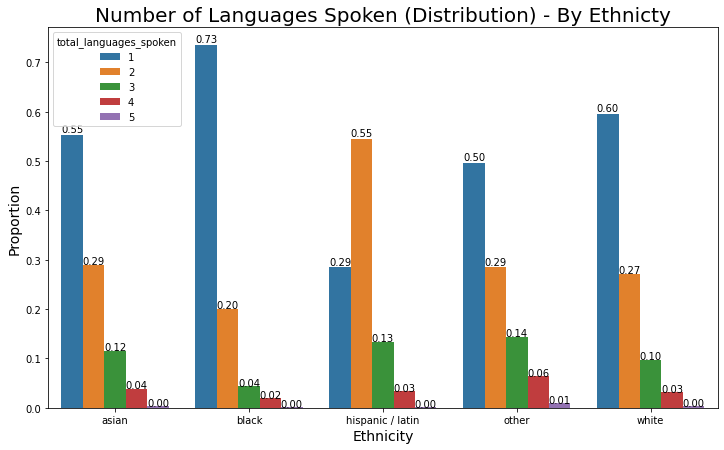

In [55]:
plt.figure(figsize=(12,7))
plt.title("Number of Languages Spoken (Distribution) - By Ethnicty",size=20)
ax = sns.barplot(data=users.total_languages_spoken.groupby(users['ethnicity']).value_counts(normalize=True).rename('proportion').reset_index(), x="ethnicity", y="proportion", hue="total_languages_spoken")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Ethnicity",fontsize=14)
show_values(ax)

#### 70% Hispanic Speak at least 2 languages in USA

Given the geographical location of USA on the map, it is quite intuitive that most of hispanic in USA speak both English and Spanish than other communities

## Income

Text(0, 0.5, 'Probability Density Function')

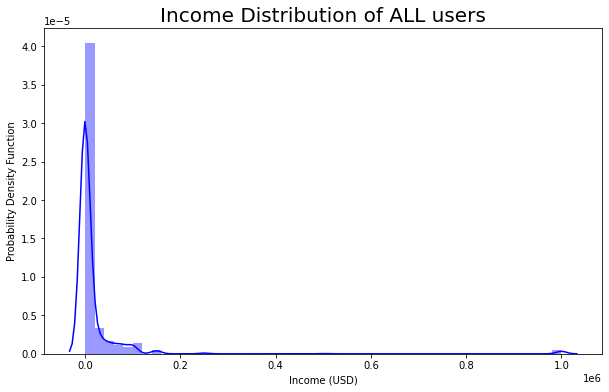

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df['income'],kde=True,color='b')
plt.title("Income Distribution of ALL users",size=20)
plt.xlabel("Income (USD)")
plt.ylabel("Probability Density Function")

In [57]:
df.income.describe([.75,.80,.9,.99])

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
50%           -1.000000
75%           -1.000000
80%           -1.000000
90%        50000.000000
99%       250000.000000
max      1000000.000000
Name: income, dtype: float64

Looking at the Income Distribution and different Percentile values, __it's evident that for almost 80% users, value of income is -1.__ <br>
And -1 represents missing/NULL data here

## Sexual Orientation

In [58]:
df.orientation.value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

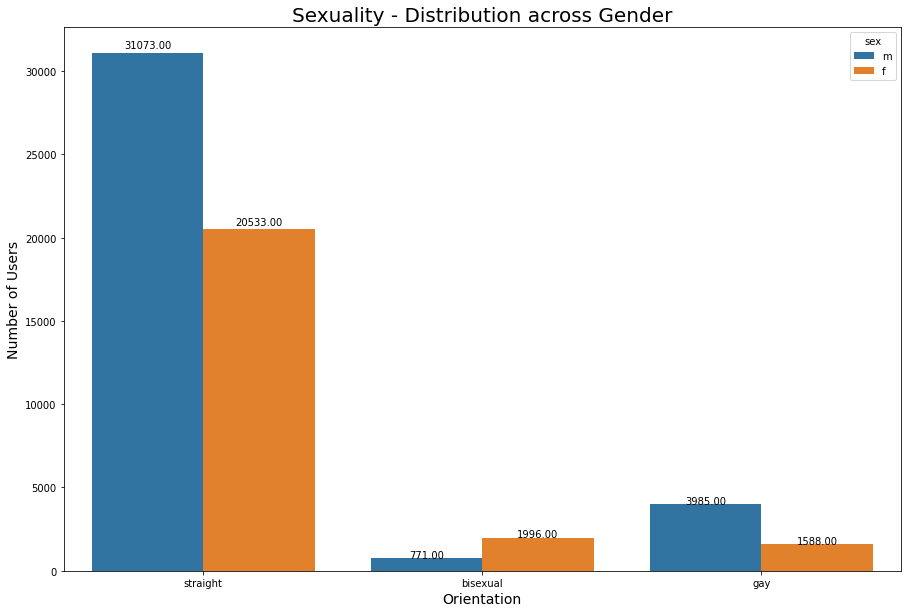

In [59]:
plt.figure(figsize=(15,10))
plt.title("Sexuality - Distribution across Gender",size=20)
ax = sns.countplot(data=df, x="orientation", hue="sex")
ax.set_ylabel('Number of Users',fontsize=14)
ax.set_xlabel("Orientation",fontsize=14)
show_values(ax)

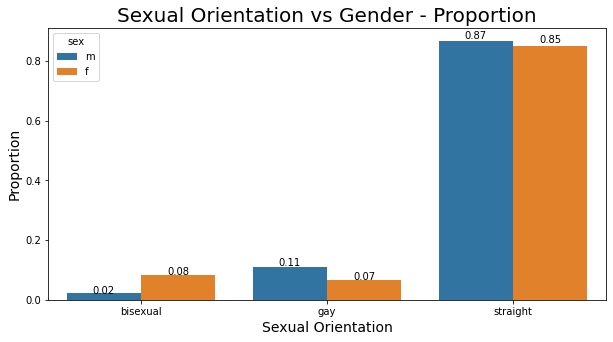

In [60]:
plt.figure(figsize=(10,5))
plt.title("Sexual Orientation vs Gender - Proportion",size=20)
ax = sns.barplot(data=df['orientation'].groupby(df['sex']).value_counts(normalize = True).rename('proportion').sort_values().reset_index(), x="orientation", y="proportion", hue="sex")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Sexual Orientation",fontsize=14)
show_values(ax)

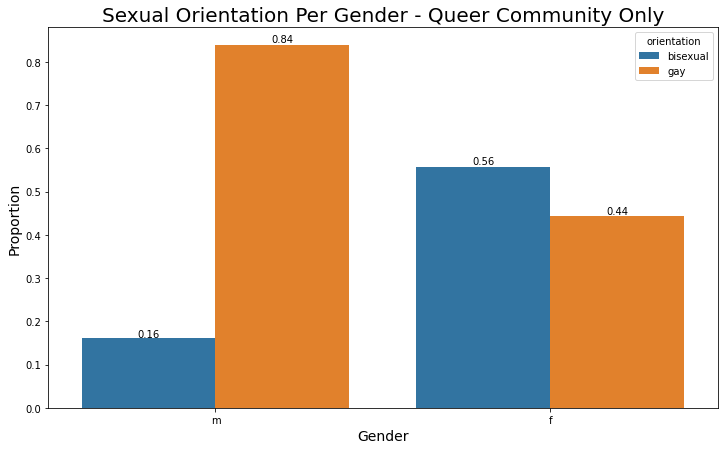

In [61]:
plt.figure(figsize=(12,7))
plt.title("Sexual Orientation Per Gender - Queer Community Only",size=20)
ax = sns.barplot(data=df[df['orientation'].isin(['bisexual','gay'])]['orientation'].groupby(df['sex']).value_counts(normalize = True).rename('proportion').sort_values().reset_index(), x="sex", y="proportion", hue="orientation")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Gender",fontsize=14)
show_values(ax)

## We observe that Straight proportion is very similar among Men and Women <br>

But in queer community, women are more (by 40%) likely to be bisexual than men. WHY?

#### Are gender and sexual orientation statistically correlated?

In [62]:
# create contingency table
data_crosstab = pd.crosstab(df['orientation'],
                            df['sex'],
                           margins=True, margins_name="Total")
data_crosstab

sex,f,m,Total
orientation,,,
bisexual,1996,771,2767
gay,1588,3985,5573
straight,20533,31073,51606
Total,24117,35829,59946


In [63]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['orientation'].dropna().unique()
columns = df['sex'].dropna().unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1494.8068025404596  and p value is: 0.0
Null Hypothesis is rejected.


### P-value is 0.00 and that suggests that there is clearly statistical relationship b/w gender and sexual orientation

Next question arises: Why men are less likely to bisexual than women? But sadly this can’t be answered with this dataset and needs different datasets

## Drug Use

In [64]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [65]:
df.drugs.isnull().sum()

14080

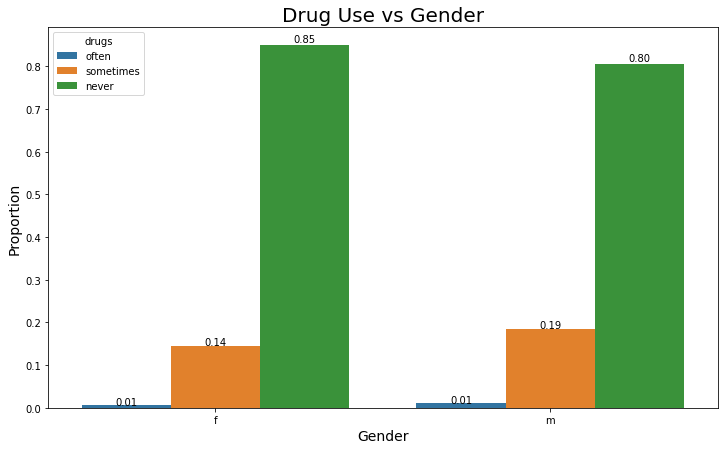

In [66]:
plt.figure(figsize=(12,7))
plt.title("Drug Use vs Gender",size=20)
ax = sns.barplot(data=df['drugs'].groupby(df['sex']).value_counts(normalize=True).rename('proportion').sort_values().reset_index(), x="sex", y="proportion", hue="drugs")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Gender",fontsize=14)
show_values(ax)

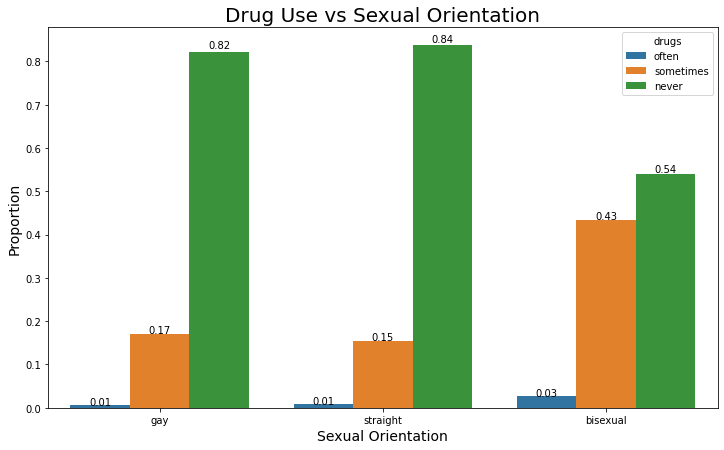

In [67]:
plt.figure(figsize=(12,7))
plt.title("Drug Use vs Sexual Orientation",size=20)
ax = sns.barplot(data=df['drugs'].groupby(df['orientation']).value_counts(normalize=True).rename('proportion').sort_values().reset_index(), x="orientation", y="proportion", hue="drugs")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Sexual Orientation",fontsize=14)
show_values(ax)

In [172]:
df.orientation.value_counts(normalize=True)

straight    0.860875
gay         0.092967
bisexual    0.046158
Name: orientation, dtype: float64

### Running Chi-squared test to check association b/w sexual orientation and drug use

In [68]:
# create contingency table
data_crosstab = pd.crosstab(df['orientation'],
                            df['drugs'],
                           margins=True, margins_name="Total")
data_crosstab

drugs,never,often,sometimes,Total
orientation,,,,
bisexual,1084,56,869,2009
gay,3545,31,734,4310
straight,33095,323,6129,39547
Total,37724,410,7732,45866


In [69]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['orientation'].dropna().unique()
columns = df['drugs'].dropna().unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1164.0060501489568  and p value is: 0.0
Null Hypothesis is rejected.


In [70]:
df['drugs_use'] = df['drugs']
df['drugs_use'].replace({'never':'no','often':'yes','sometimes':'yes'},inplace=True)

In [71]:
users['drugs_use'] = users['drugs']
users['drugs_use'].replace({'never':'no','often':'yes','sometimes':'yes'},inplace=True)

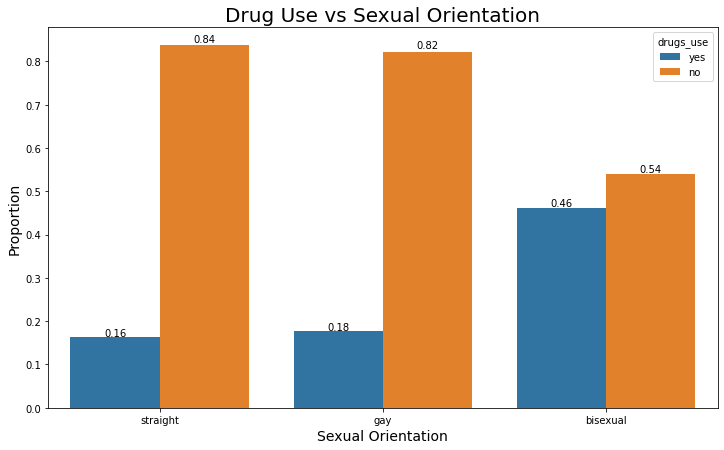

In [72]:
plt.figure(figsize=(12,7))
plt.title("Drug Use vs Sexual Orientation",size=20)
ax = sns.barplot(data=df['drugs_use'].groupby(df['orientation']).value_counts(normalize=True).rename('proportion').sort_values().reset_index(), x="orientation", y="proportion", hue="drugs_use")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Sexual Orientation",fontsize=14)
show_values(ax)

In [73]:
# create contingency table
data_crosstab = pd.crosstab(df['orientation'],
                            df['drugs_use'],
                           margins=True, margins_name="Total")
data_crosstab

drugs_use,no,yes,Total
orientation,,,
bisexual,1084,925,2009
gay,3545,765,4310
straight,33095,6452,39547
Total,37724,8142,45866


In [74]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['orientation'].dropna().unique()
columns = df['drugs_use'].dropna().unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1157.2449109559334  and p value is: 0.0
Null Hypothesis is rejected.


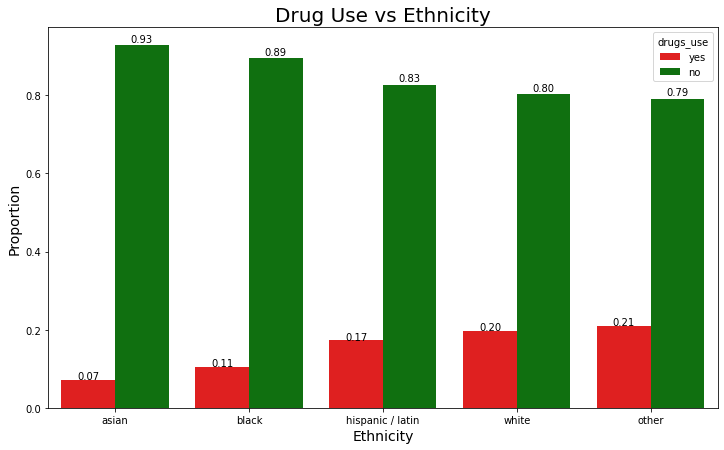

In [75]:
plt.figure(figsize=(12,7))
plt.title("Drug Use vs Ethnicity",size=20)
palette ={"yes": "red", "no":"green"}
ax = sns.barplot(data=users['drugs_use'].groupby(users['ethnicity']).value_counts(normalize=True).rename('proportion').sort_values().reset_index(), x="ethnicity", y="proportion", hue="drugs_use",palette=palette)
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Ethnicity",fontsize=14)
show_values(ax)

1. We see Asian has the lowest proportion of drug use
2. While white have the highest proportion in the data


#### Since religious beliefs/values differ among differ ethnicities, it is possible that willingness to try drugs is influenced by that

## Drinking Preferences

In [76]:
df.drinks.unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

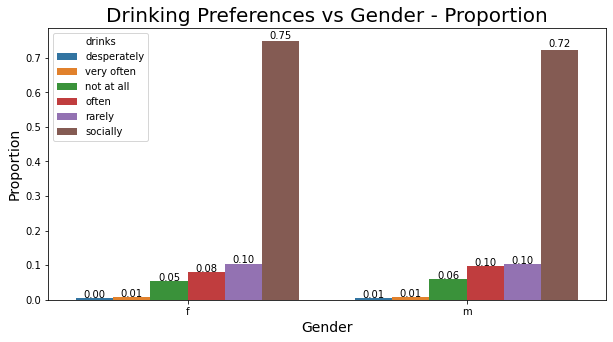

In [77]:
plt.figure(figsize=(10,5))
plt.title("Drinking Preferences vs Gender - Proportion",size=20)
ax = sns.barplot(data=df['drinks'].groupby(df['sex']).value_counts(normalize = True).rename('proportion').sort_values().reset_index(), x="sex", y="proportion", hue="drinks")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Gender",fontsize=14)
show_values(ax)

In [78]:
users['drinking_p'] = users['drinks']
users['drinking_p'].replace({'not at all':'no','often':'yes','rarely':'yes','socially':'yes','very often':'yes','desperately':'yes'},inplace=True)

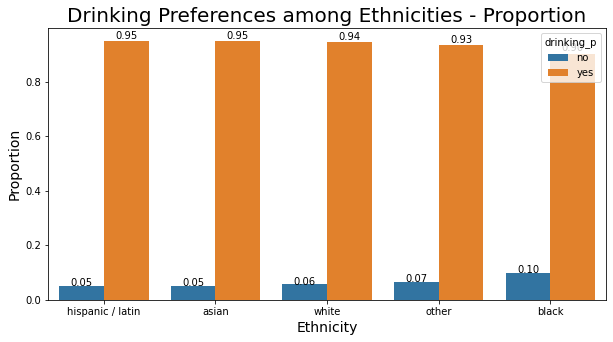

In [79]:
plt.figure(figsize=(10,5))
plt.title("Drinking Preferences among Ethnicities - Proportion",size=20)
ax = sns.barplot(data=users['drinking_p'].groupby(users['ethnicity']).value_counts(normalize = True).rename('proportion').sort_values().reset_index(), x="ethnicity", y="proportion", hue="drinking_p")
ax.set_ylabel('Proportion',fontsize=14)
ax.set_xlabel("Ethnicity",fontsize=14)
show_values(ax)

10% of Black users in dataset don’t drink AT ALL. <br>

‘No drinking’ rate is 5% for global. So for black this rate is significantly higher. <br>
Next question arises: Why this is the case?


#### It could be that since in US black community is at economic disadvantage, many people save by not drinking at all. (but this is just one plausible hypothesis)